<a href="https://colab.research.google.com/github/ezahner/IDS/blob/main/HW5/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


**Erin Zahner**

**Project 5**


---



In [139]:
import pandas as pd
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")

data

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


In [140]:
data.isna().any()

Type            False
Alcohol_flag    False
Sugar_flag      False
dtype: bool



---


After importing the dataframe, I first had to ensure that there were no missing values within the data. After doing the line of code above, I can conclude that there are no missing values and I can continue on without editing the dataframe.


---



In [141]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_data = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, data.shape[1]):
    if data.dtypes[i]=='object' or data.dtypes[i]=='bool':
        encoded_data[data.columns[i]] = le.fit_transform(data[data.columns[i]])



print("-=========================================")
print(data)
print("-=========================================")
encoded_data


-=========================================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1




---


Next, I encoded all categoric and boolean vales. To do this I looked at the notes and followed the steps laid out there. Now, all of the categoric values have correspoding numeric values.


---



In [142]:

#create contingency table type vs alcohol content
type_alcohol_table = pd.crosstab(encoded_data.Type, encoded_data.Alcohol_flag)

type_alcohol_table

Alcohol_flag,0,1
Type,,
0,485,600
1,1176,1084


In [143]:
#create contingency table type vs sugar content
type_sugar_table = pd.crosstab(encoded_data.Type, encoded_data.Sugar_flag)

type_sugar_table

Sugar_flag,0,1
Type,,
0,237,848
1,1382,878




---

Then, I made two contingency tables, one for Type of Wine vs. Alcohol Flag and one for Type of Wine vs. Sugar Flag. These contingency tables tell us a lot of information about the trends in sugar and alcohol content when it comes to red vs white wine. I will make a bar graph based off the tables to help with further analysis of the information presented.

---




<Axes: title={'center': 'Contingency Table of Type vs Sugar Content'}, xlabel='type', ylabel='sugar'>

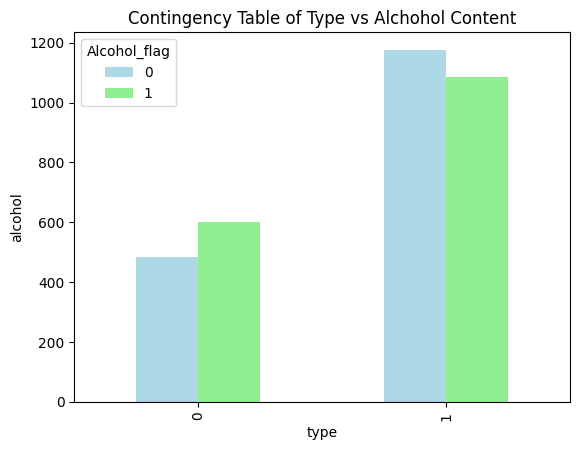

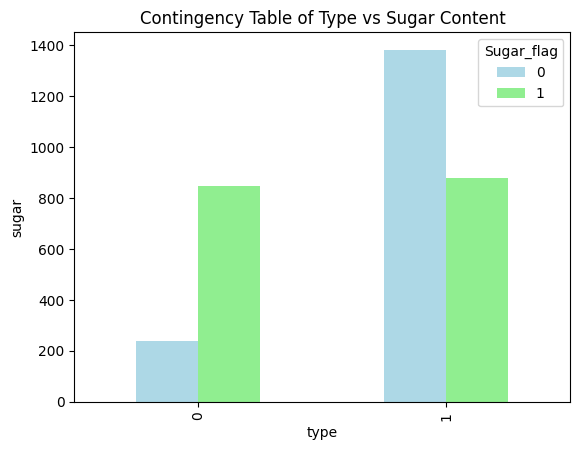

In [144]:
import matplotlib.pyplot as plt

colors = {"lightblue", "lightgreen"}

#plot type vs alcohol content contingency table
type_alcohol_table.plot(kind="bar", stacked=False,
                         title="Contingency Table of Type vs Alchohol Content",
                         xlabel="type",
                         ylabel="alcohol",
                         color = colors)

#plot type vs sugar content contingency table
type_sugar_table.plot(kind="bar", stacked=False,
                         title="Contingency Table of Type vs Sugar Content",
                         xlabel="type",
                         ylabel="sugar",
                         color = colors)




---


These bar graphs are based on the encoded data, so they are a little harder to read at first glance since everything is labeled as 0 or 1. For some clarification, the blue bar in both graphs is red wine and the green bar is white wine. For both sugar and alcohol, the 0 refers to high concentrations, and the 1 refers to low concentrations. Knowing this, we can see that the majority of both red and white wine have a low alcohol content, with slightly more red wines have low alcohol percentages than white. There is a much more drastic difference when it comes to the sugar content. Very few red wines have a high sugar content, while about half of the white wines have high sugar. These findings will further be explored in the next section of the notebook looking at probabilities.


---



In [145]:
#prior probability of Type=Red

type_red = 0                                                                    #encoded number for red wine
total_count = type_alcohol_table.sum().sum()                                    #total count of values in table
red_count = type_alcohol_table.loc[type_red].sum()                              #count of all values of red
prior_probability_red = red_count / total_count                                 #divide count of red by total

print(f"The prior probability of Red occurring is: {prior_probability_red}")

The prior probability of Red occurring is: 0.3243647234678625


In [146]:
#prior probability of Type=White

type_white = 1                                                                  #encoded number for white wine
total_count = type_alcohol_table.sum().sum()                                    #total count of values in table
white_count = type_alcohol_table.loc[type_white].sum()                          #count of all values of white
prior_probability_white = white_count / total_count                             #divide count of white by total

print(f"The prior probability of White occurring is: {prior_probability_white}")

The prior probability of White occurring is: 0.6756352765321375




---

The first two probabilities were simply a measure of red vs white wine. There are more white wines in the data, therefore, the probability of white wine is significantly higher than red. The prior probability of white wine is 0.68, while the prior probability of red wine is only 0.32.

---






In [147]:
#probability of high alcohol content

high_alc_content = 0                                                            #encoded number for high alcohol
count_high_alc = type_alcohol_table[high_alc_content].sum()                     #count for all values of high alc

total_count =  type_alcohol_table[[0, 1]].sum().sum()                           #total count of values

probability_high_alcohol = count_high_alc / total_count                         #divide count of high alc by total

print(f"The probability of high alcohol content is: {probability_high_alcohol}")

The probability of high alcohol content is: 0.49656203288490286


In [148]:
#probability of low alcohol content

low_alc_content = 1                                                             #encoded number for low alcohol
count_low_alc = type_alcohol_table[low_alc_content].sum()                       #count of all values of low alc

total_count =  type_alcohol_table[[0, 1]].sum().sum()                           #total count of values

probability_low_alcohol = count_low_alc / total_count                           #divide count of low alc by total

print(f"The probability of low alcohol content is: {probability_low_alcohol}")

The probability of low alcohol content is: 0.5034379671150971




---

Next, we looked at the probability of high vs low alcohol content. From this, we can see it is almost a 50-50 split between high and low. The probability of a wine having a high alcohol flag is 0.49, while the probability of a low alcohol flag waas similarly 0.50.

---



In [149]:
#probability of high sugar content

high_sugar_content = 0                                                          #encoded number for high sugar
count_high_sugar = type_sugar_table[high_sugar_content].sum()                   #count of all values of high sugar

total_count =  type_sugar_table[[0, 1]].sum().sum()                             #total count of values

probability_high_sugar = count_high_sugar / total_count                         #divide count of high sugar by total

print(f"The probability of high sugar content is: {probability_high_sugar}")

The probability of high sugar content is: 0.48400597907324366


In [150]:
#probability of low sugar content

low_sugar_content = 1                                                           #encoded number for low sugar
count_low_sugar = type_sugar_table[low_sugar_content].sum()                     #count of all values of low sugar

total_count =  type_sugar_table[[0, 1]].sum().sum()                             #total count of values

probability_low_sugar = count_low_sugar / total_count                           #divide count of low sugar by total

print(f"The probability of low sugar content is: {probability_low_sugar}")

The probability of low sugar content is: 0.5159940209267564




---

The same can be said when it comes to sugar content, there is almost a completely even split between a wine having high sugar and a wine having low sugar. The probability of high sugar is 0.48 and the probability of low sugar is 0.52.

---




In [151]:
# The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red)

high_alcohol_given_red = type_alcohol_table.loc[0, 0] / red_count               #divide value of red wine with high alc by total red count

low_alcohol_given_red = type_alcohol_table.loc[0, 1] / red_count                #divide value of red wine with low alc by total red count

print(f"The probability of high alcohol given red is: {high_alcohol_given_red}")
print(f"The probability of low alcohol given red is: {low_alcohol_given_red}")

The probability of high alcohol given red is: 0.4470046082949309
The probability of low alcohol given red is: 0.5529953917050692


In [152]:
#The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red)
high_sugar_given_red = type_sugar_table.loc[0, 0] / red_count                   #divide value of red wine with high sugar by total red count

low_sugar_given_red = type_sugar_table.loc[0, 1] / red_count                    #divide value of red wine with low sugar by total red count

print(f"The probability of high sugar given red is: {high_sugar_given_red}")
print(f"The probability of low sugar given red is: {low_sugar_given_red}")

The probability of high sugar given red is: 0.2184331797235023
The probability of low sugar given red is: 0.7815668202764977




---

These are the more interesting and telling probabilities. These are the probabilities of high/low alcohol or sugar *given* that it is red wine. Here, we can see that given red wine, the probability of high vs low alcohol is pretty similar. The probability of high alcohol is 0.45, while the probability of low alcohol is 0.55. Sugar, on the other hand, has a much more drastic difference between the probability of high or low concentrations. The probability of high sugar content given red wine is only 0.22, while the probability of low sugar is 0.78. From this information, we can determine that given red wine, it is likely to have a low sugar content, however, the chances of high or low alcohol content are almost 50-50.

---






<h1>80-20 Split</h1>





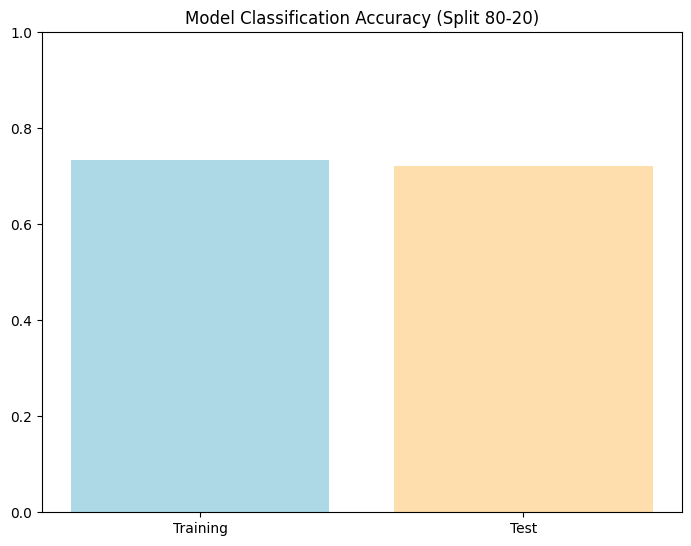

In [156]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data preparation
X = encoded_data.iloc[:, 1:]
y = encoded_data.iloc[:, 0]

# Split ratio 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.20, stratify=y)

NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

# Calculate accuracy
train_score_80_20 = NBmodel.score(X_train, y_train)
test_score_80_20 = NBmodel.score(X_test, y_test)

# Plot accuracy
labels = ["Training", "Test"]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Model Classification Accuracy (Split 80-20)')
ax.bar(labels, [train_score_80_20, test_score_80_20], color=["lightblue", "navajowhite"])
ax.set_ylim(0, 1)
plt.show()



In [157]:
print(f"Training Accuracy (80-20 split): {train_score_80_20}")
print(f"Test Accuracy (80-20 split): {test_score_80_20}")

Training Accuracy (80-20 split): 0.734304932735426
Test Accuracy (80-20 split): 0.7204783258594918


<h1>75-25 Split</h1>

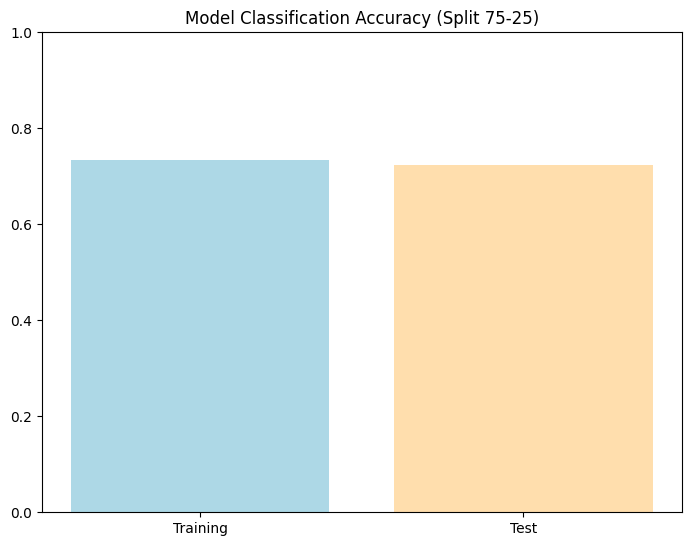

In [158]:
# Split ratio 75-25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.25, stratify=y)

NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

train_score_75_25 = NBmodel.score(X_train, y_train)
test_score_75_25 = NBmodel.score(X_test, y_test)

labels = ["Training", "Test"]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Model Classification Accuracy (Split 75-25)')
ax.bar(labels, [train_score_75_25, test_score_75_25], color=["lightblue", "navajowhite"])
ax.set_ylim(0, 1)
plt.show()



In [159]:
print(f"Training Accuracy (75-25 split): {train_score_75_25}")
print(f"Test Accuracy (75-25 split): {test_score_75_25}")

Training Accuracy (75-25 split): 0.7344497607655502
Test Accuracy (75-25 split): 0.7228195937873357


<h1>70-30 Split</h1>

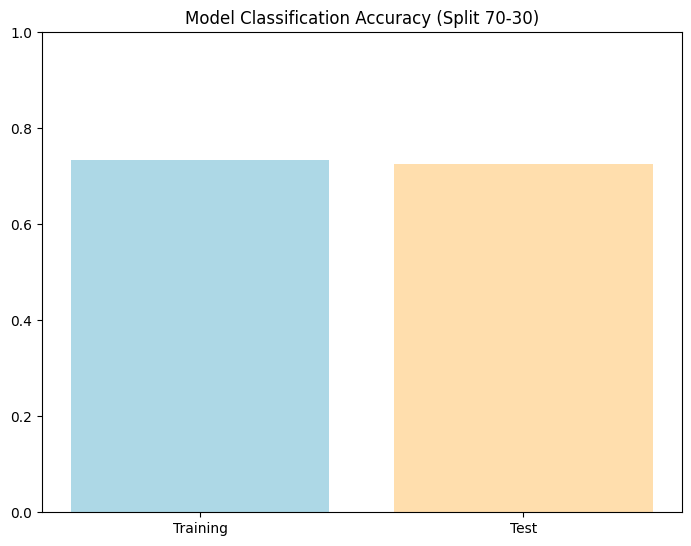

In [160]:
# Split ratio 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.30, stratify=y)

NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

train_score_70_30 = NBmodel.score(X_train, y_train)
test_score_70_30 = NBmodel.score(X_test, y_test)

labels = ["Training", "Test"]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Model Classification Accuracy (Split 70-30)')
ax.bar(labels, [train_score_70_30, test_score_70_30], color=["lightblue", "navajowhite"])
ax.set_ylim(0, 1)
plt.show()


In [161]:
print(f"Training Accuracy (70-30 split): {train_score_70_30}")
print(f"Test Accuracy (70-30 split): {test_score_70_30}")

Training Accuracy (70-30 split): 0.7338744126441692
Test Accuracy (70-30 split): 0.7260956175298805


<h1>60-40 Split</h1>

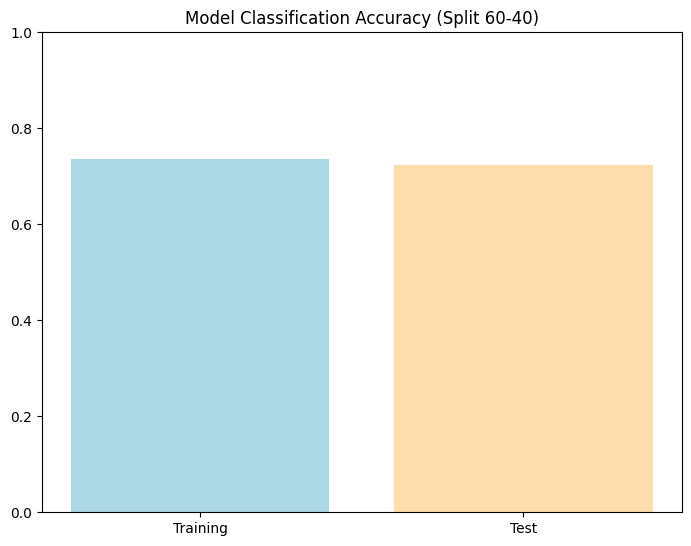

In [162]:
# Split ratio 60-40
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.40, stratify=y)

NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

train_score_60_40 = NBmodel.score(X_train, y_train)
test_score_60_40 = NBmodel.score(X_test, y_test)

labels = ["Training", "Test"]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Model Classification Accuracy (Split 60-40)')
ax.bar(labels, [train_score_60_40, test_score_60_40], color=["lightblue", "navajowhite"])
ax.set_ylim(0, 1)
plt.show()

In [163]:
print(f"Training Accuracy (60-40 split): {train_score_60_40}")
print(f"Test Accuracy (60-40 split): {test_score_60_40}")

Training Accuracy (60-40 split): 0.7364225211758844
Test Accuracy (60-40 split): 0.7242152466367713


<h1>50-50 Split</h1>

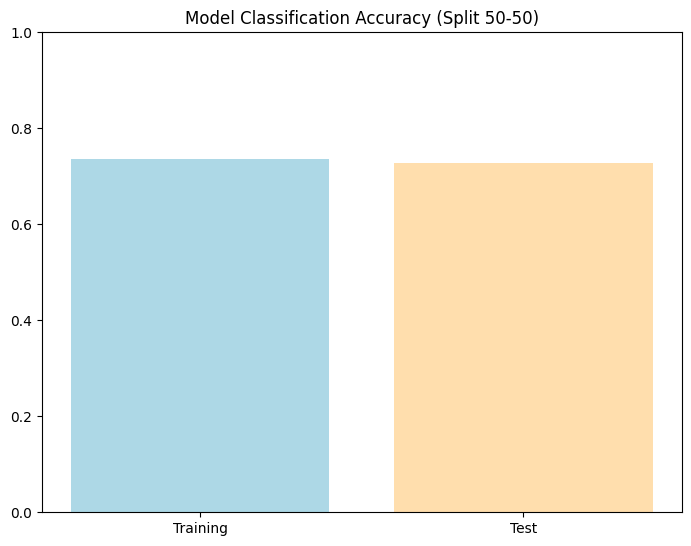

In [164]:
# Split ratio 50-50
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.50, stratify=y)

NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

train_score_50_50 = NBmodel.score(X_train, y_train)
test_score_50_50 = NBmodel.score(X_test, y_test)

labels = ["Training", "Test"]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Model Classification Accuracy (Split 50-50)')
ax.bar(labels, [train_score_50_50, test_score_50_50], color=["lightblue", "navajowhite"])
ax.set_ylim(0, 1)
plt.show()

In [165]:
print(f"Training Accuracy (50-50 split): {train_score_50_50}")
print(f"Test Accuracy (50-50 split): {test_score_50_50}")

Training Accuracy (50-50 split): 0.7350478468899522
Test Accuracy (50-50 split): 0.7280334728033473


<h1>90-10 Split</h1>

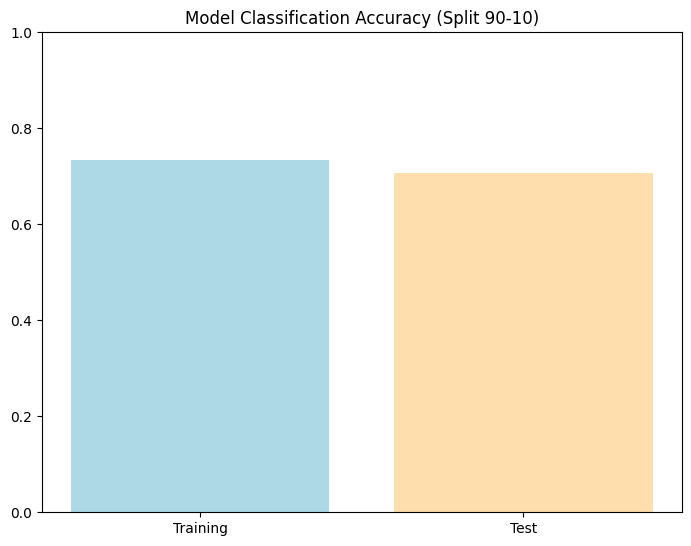

In [166]:
# Split ratio 90-10
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.10, stratify=y)

NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

train_score_90_10 = NBmodel.score(X_train, y_train)
test_score_90_10 = NBmodel.score(X_test, y_test)

labels = ["Training", "Test"]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Model Classification Accuracy (Split 90-10)')
ax.bar(labels, [train_score_90_10, test_score_90_10], color=["lightblue", "navajowhite"])
ax.set_ylim(0, 1)
plt.show()

In [167]:
print(f"Training Accuracy (90-10 split): {train_score_90_10}")
print(f"Test Accuracy (90-10 split): {test_score_90_10}")

Training Accuracy (90-10 split): 0.7342192691029901
Test Accuracy (90-10 split): 0.7074626865671642


<h2>Compared Accuracy of Models</h2>

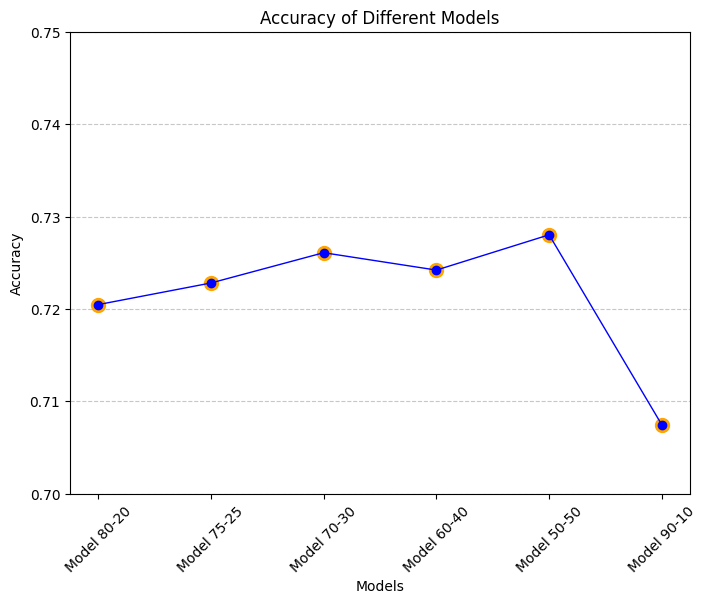

In [168]:
model_names = ['Model 80-20', 'Model 75-25', 'Model 70-30', 'Model 60-40', 'Model 50-50', 'Model 90-10']
accuracy_scores = [test_score_80_20, test_score_75_25, test_score_70_30, test_score_60_40, test_score_50_50, test_score_90_10]

# Plotting the accuracy scores as a scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(model_names, accuracy_scores, color='orange', s=100)  # 's' controls the marker size
plt.plot(model_names, accuracy_scores, color='blue', marker='o', linestyle='-', linewidth=1)  # Connect points with a line

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.70, 0.75)  # Set y-axis limit from 0.70 to 0.80 for accuracy scores
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.show()

For training and testing data, I tried several different splits on the data, to see how the accuracy would change. First, I tried an 80-20 split, dedicating 80% of the data to training and 20% to testing. With this split, the accuracy of both training and testing appears to be 0.7 or 70%. This was the same for 75-25, 70-30, 60-40, and 50-50. The only time I was able to see the accuracy to change in the slightest was a 10-90 split, but even then the accuracy was close to 70% for both.